In [1]:
import tacoma as tc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import evaluation_networks as en
import contact_networks as cn
import os
import util
from util import plot_contact_durations
from tacoma.analysis import plot_degree_distribution

In [2]:
path = './data_eval_split/supermarked/'
files = os.listdir(path)

In [11]:
supermarked_files = files[0:6]
networks = []
for file in supermarked_files:
    EN = en.EvaluationNetwork('supermarked', path + file)
    EN.to_tacoma_tn()
    networks.append(EN.tn)

edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0


Text(0.5, 1.0, 'inter contact duration')

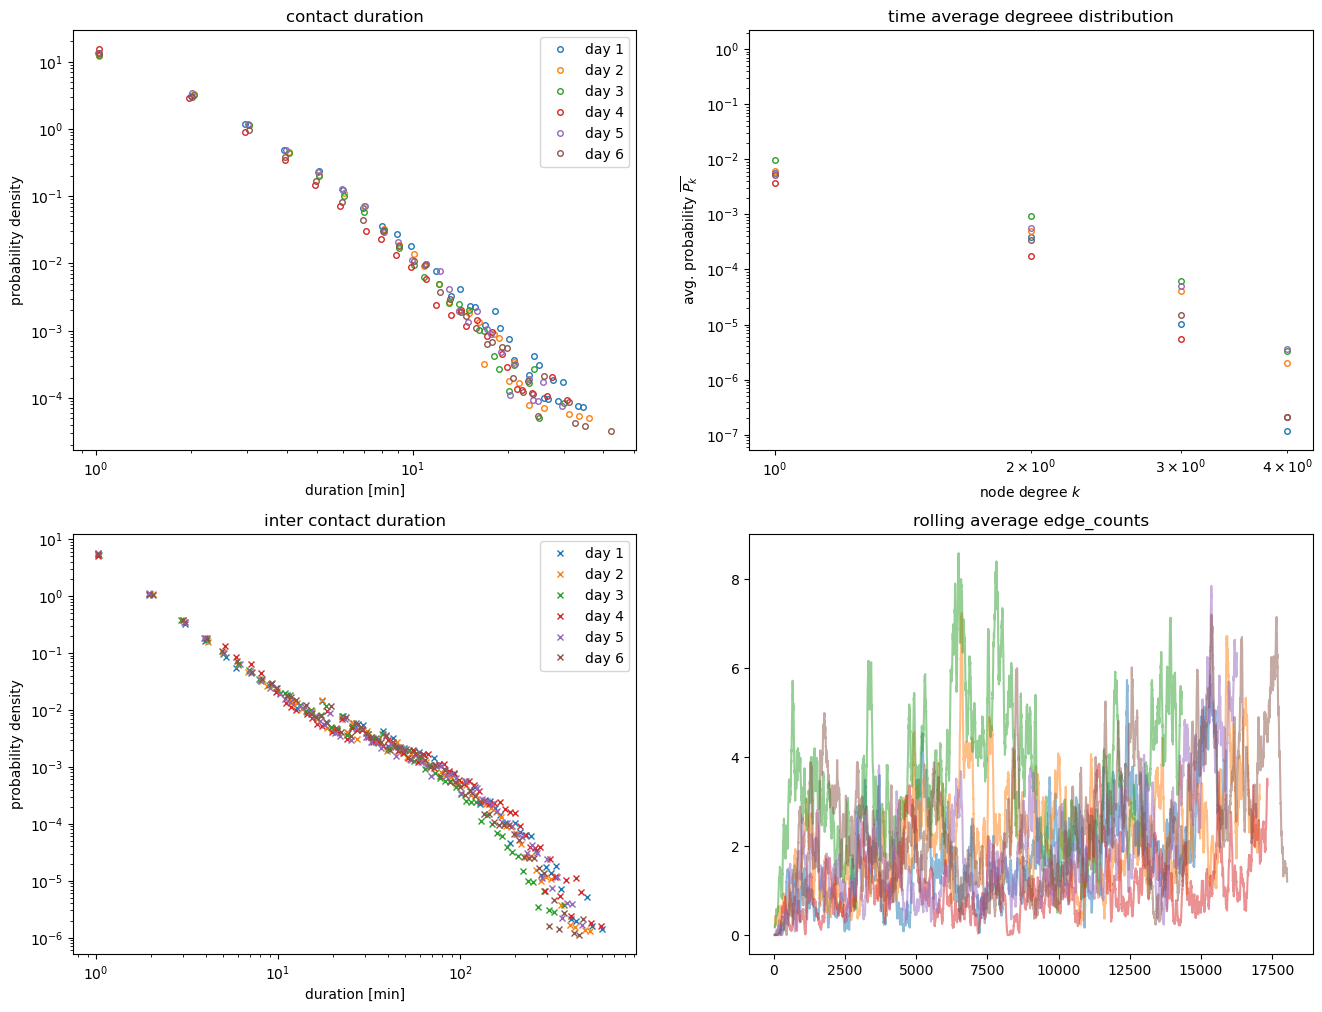

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
(ax1, ax2, ax3, ax4) = axs.flatten()
labels = [['contact', 'inter contact'], ['model contact', 'model inter contact']]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labels2 = ['day 1', 'day 2', 'day 3', 'day 4', 'day 5', 'day 6', 'day 7']

for i, tn in enumerate(networks):
    res = tc.api.measure_group_sizes_and_durations(tn)
    plot_contact_durations(res, (ax1, ax3), fit_power_law=True, bins=100, xlabel='duration [min]', color=colors[i], label=[labels2[i], labels2[i]])

    degree = np.array(tc.api.degree_distribution(tn))
    degree = degree[degree > 0]
    plot_degree_distribution(degree, ax2, label=labels2[i])

    _, _, m = tc.edge_counts(tn)
    smoothing = 60
    m, t = util.moving_average(m[:-1], smoothing), util.moving_average(tn.t, smoothing)
    ax4.plot(t, m, color=colors[i], label=labels2[i], alpha=.5)

ax4.set_title('rolling average edge_counts')
ax2.set_title('time average degreee distribution')
ax1.set_title('contact duration')
ax3.set_title('inter contact duration')

# RWP

In [6]:
EN = en.EvaluationNetwork('supermarked', path + files[2])
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

n_space = 10
rwp_wt_max = 5
v_RWP_min = .5
v_RWP_max = 1.5
Loc = cn.Location(0, n_space, n_space, 5, 5)
model_kwargs = {'RWP_WT_MAX': rwp_wt_max, 'v_RWP_min': v_RWP_min, 'v_RWP_max': v_RWP_max}
EN.cn_approximation(Loc, 'RWP', 1, model_kwargs)
res = EN.overview_plots(True, 4)

'''n_spaces = np.arange(3, 11)
RWP_WT_MAXs = np.arange(3, 11)
v_RWP_mins = np.arange(.25, 2., .25)
v_RWP_maxs = np.arange(1., 4., .25)

results = []
grid = util.combine_arrays(RWP_WT_MAXs, v_RWP_mins, v_RWP_maxs)
print(grid)
print(grid.size)'''
'''for i, n_space in enumerate(n_spaces):
    for j, rwp_wt_max in enumerate(RWP_WT_MAXs):
        for k, v_RWP_min in enumerate(v_RWP_mins):
            for l, v_RWP_max in enumerate(v_RWP_maxs):
                if v_RWP_min >= v_RWP_max:
                    continue
                
                Loc = cn.Location(0, n_space, n_space, 5, 5)
                model_kwargs = {'RWP_WT_MAX': rwp_wt_max, 'v_RWP_min': v_RWP_min, 'v_RWP_max': v_RWP_max}
                EN.cn_approximation(Loc, 'RWP', 1, model_kwargs)
                res = EN.overview_plots(True, i+j+k+l)
                results.append(res)
                print(results)
'''

edge list errors:  0
edge changes errors:  0
Initialized contact network model
Start making movement
Model paras: v_RWP_min/max=(0.5, 1.5), RWP_WT_MAX=5
finished simulation 
start working on network
Start network construction
0/14358
10000/14358
edge list errors:  0
edge changes errors:  0


"for i, n_space in enumerate(n_spaces):\n    for j, rwp_wt_max in enumerate(RWP_WT_MAXs):\n        for k, v_RWP_min in enumerate(v_RWP_mins):\n            for l, v_RWP_max in enumerate(v_RWP_maxs):\n                if v_RWP_min >= v_RWP_max:\n                    continue\n                \n                Loc = cn.Location(0, n_space, n_space, 5, 5)\n                model_kwargs = {'RWP_WT_MAX': rwp_wt_max, 'v_RWP_min': v_RWP_min, 'v_RWP_max': v_RWP_max}\n                EN.cn_approximation(Loc, 'RWP', 1, model_kwargs)\n                res = EN.overview_plots(True, i+j+k+l)\n                results.append(res)\n                print(results)\n"

# TLW

In [7]:
EN = en.EvaluationNetwork('supermarked', path + files[2])
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

n_space = 10
TLW_WT_MAX = 100  # maximum value of the waiting time distribution. Default is 100
TLW_WT_EXP = -1.8  # exponent of the waiting time distribution. Default is -1.8
FL_MAX = 50  # maximum value of the flight length distribution. Default is 50
FL_EXP = -2.6  # exponent of the flight length distribution. Default is -2.6

Loc = cn.Location(0, n_space, n_space, 5, 5)
model_kwargs = {'TLW_WT_MAX': TLW_WT_MAX, 'TLW_WT_EXP': TLW_WT_EXP, 'FL_MAX': FL_MAX, 'FL_EXP': FL_EXP}
EN.cn_approximation(Loc, 'TLW', 1, model_kwargs)
res = EN.overview_plots(True, 4)

edge list errors:  0
edge changes errors:  0
Initialized contact network model
Start making movement
Model paras: TLW_WT_MAX=100, TLW_WT_EXP=-1.8, FL_MAX=50, FL_EXP=-2.6
finished simulation 
start working on network
Start network construction
0/14358
10000/14358
edge list errors:  0
edge changes errors:  0


/localdata2/scho_jj/Pandemic_Networks/traf2net/evaluation_networks.py:295: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_test_degrees = ks_2samp(degrees[0], degrees[1])


# STEPS

In [8]:
EN = en.EvaluationNetwork('supermarked', path + files[2])
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

n_space = 10
TLW_WT_MAX = 100  # maximum value of the waiting time distribution. Default is 100
TLW_WT_EXP = -1.8  # exponent of the waiting time distribution. Default is -1.8
FL_MAX = 50  # maximum value of the flight length distribution. Default is 50
FL_EXP = -2.6  # exponent of the flight length distribution. Default is -2.6

Loc = cn.Location(0, n_space, n_space, 5, 5)
model_kwargs = {'TLW_WT_MAX': TLW_WT_MAX, 'TLW_WT_EXP': TLW_WT_EXP, 'FL_MAX': FL_MAX, 'FL_EXP': FL_EXP}
EN.cn_approximation(Loc, 'STEPS_with_RWP', 1, model_kwargs)
res = EN.overview_plots(True, 0)

edge list errors:  0
edge changes errors:  0
Initialized contact network model
Start making movement
Model paras: k=1.2, STEPS_pause_min/max=(20, 30), v_STEPS_min/max=(0.83, 3.2), v_RWP_min/max=(0.1, 1.0), RWP_WT_MAX=5
finished simulation 
start working on network
Start network construction
0/14358
10000/14358
edge list errors:  0
edge changes errors:  0


# Random

In [9]:
df = pd.read_parquet('./data_eval_split/supermarked/f0_2021-03-17_trajectories.parquet')
df

,activity_start_min,activity_end_min,p_id
0,2058,2798,0
1,7632,8061,1
2,11589,13167,2
3,15649,15911,3
4,2089,2960,4
...,...,...,...
534,13680,14159,534
535,2474,3543,535
536,5967,6960,536
537,12477,12854,537


In [9]:
EN = en.EvaluationNetwork('supermarked', path + files[2])
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

n_space = 10
p_add, pareto_shape = .004, 2.0

Loc = cn.Location(0, n_space, n_space, 5, 5)
model_kwargs = {'p_add': p_add, 'pareto_shape': pareto_shape}
EN.cn_approximation(Loc, 'random', 1, model_kwargs)
res = EN.overview_plots(True, 3)

edge list errors:  0
edge changes errors:  0
Initialized contact network model
Start making movement
random is not movement based. Return
finished simulation 
start working on network
Start network construction
edge changes errors:  0


# Community metrics

In [3]:
import teneto

/home/scho_jj/.conda/envs/pandemic_networks_env/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_parquet('./data_eval_split/supermarked/f0_2021-03-17.parquet')[['i', 'j', 't']]

def downscale_time(df, new_time):
    # new_time: one time_step in the downscaled df corresponds to new_time*time_step in old df
    # Assuming df has coloumn t
    df.t = np.floor(df.t / new_time).astype('int')
    return df.drop_duplicates().reset_index(drop=True)

df = downscale_time(df, 20)  # rescale time to be comparable to sociopatterns
df

,i,j,t
0,177,290,5
1,177,290,6
2,261,265,7
3,160,362,9
4,160,362,10
...,...,...,...
6655,33,84,795
6656,143,475,795
6657,475,484,795
6658,48,168,795


In [5]:
tn = teneto.TemporalNetwork(from_df=df, forcesparse=True, nettype='bu')
#tn.T = df.t.max()
#communities = teneto.communitydetection.temporal_louvain(tn, njobs=20)
print(tn.N, tn.T)

539 791


In [6]:
ict = teneto.networkmeasures.intercontacttimes(tn)['intercontacttimes']
ict_dict = {}
icts = []

N = ict.shape[0]
for i in range(N):
    for j in range(N):
        if ict[i, j] is not None:
            ict_dict[(i, j)] = ict[i, j]
            icts.extend(ict[i, j])

icts = np.array(icts)

Text(0.5, 1.0, 'inter contact time')

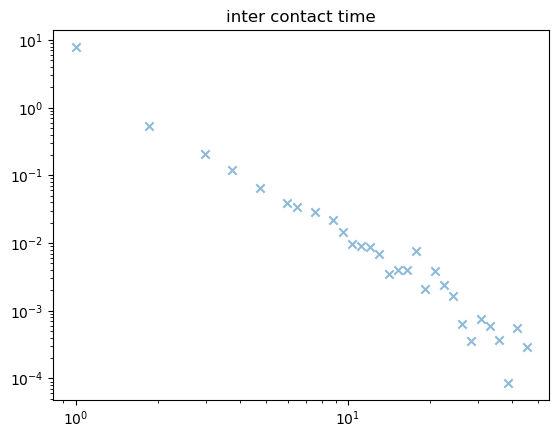

In [7]:

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  counts, bins, _ = plt.hist(x, bins=logbins, density=True)
  plt.close()
  plt.scatter(bins[:-1], counts, marker='x', alpha=.5)
  plt.xscale('log')
  plt.yscale('log')

plot_loghist(icts, 50)
plt.title('inter contact time')

In [8]:
degree_centrality = teneto.networkmeasures.temporal_degree_centrality(tn)

In [9]:
#betweenness_centrality = teneto.networkmeasures.temporal_betweenness_centrality(tn)
paths = teneto.networkmeasures.shortest_temporal_path(tn, i=list(range(2)))

0
1


KeyboardInterrupt: 

In [86]:
degree_centrality

(539,)

In [83]:
communities = teneto.communitydetection.temporal_louvain(tn, njobs=20)

0


IndexError: index 426517 is out of bounds for axis 0 with size 426349